In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"F:\LPU\Data\Datasets\Internship datasets\Loan Dataset\Loan 1.csv")

In [3]:
df = pd.DataFrame(data)
df.head(5)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908


In [4]:
df.isnull().sum()

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

In [5]:
df.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                    object
Property Price                  object
dtype: object

In [6]:
df['Gender'].value_counts()

Gender
F    10142
M     9827
Name: count, dtype: int64

In [7]:
df['Gender']=df['Gender'].astype('string')

In [8]:
df['Gender'].dtypes

string[python]

In [9]:
df['Gender'] = df['Gender'].astype('string')
df['Gender'] = df['Gender'].replace(' ', 'NA')

counts = df['Gender'].value_counts()

In [10]:
output = counts.reset_index()
output.columns = ['Gender', 'count']
output = output.sort_values(by='Gender').reset_index(drop=True)

print(output)

  Gender  count
0      F  10142
1      M   9827


In [11]:
df['Gender'] = df['Gender'].astype(str).str.strip().replace(['', ' '], 'NA')
print(df['Gender'].unique())


['F' 'M' '<NA>']


In [12]:
df['Gender'].value_counts()

Gender
F       10142
M        9827
<NA>       31
Name: count, dtype: int64

In [13]:
df.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

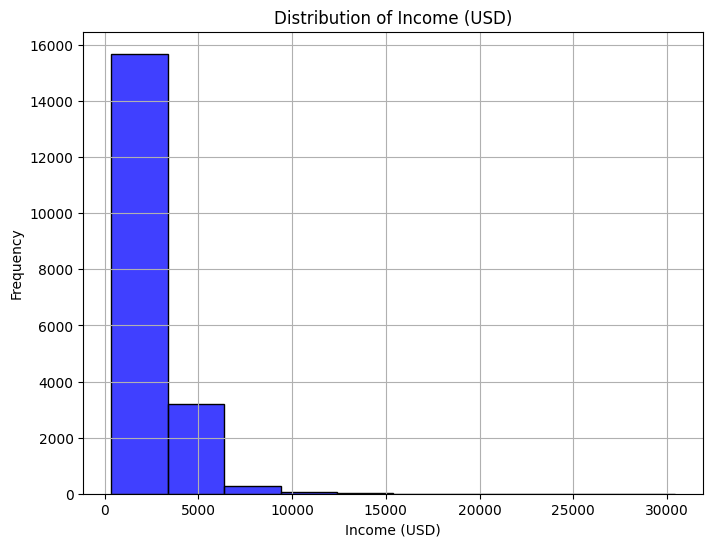

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Income (USD)'], bins=10, kde=False, color='blue', edgecolor='black')
plt.title('Distribution of Income (USD)')
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

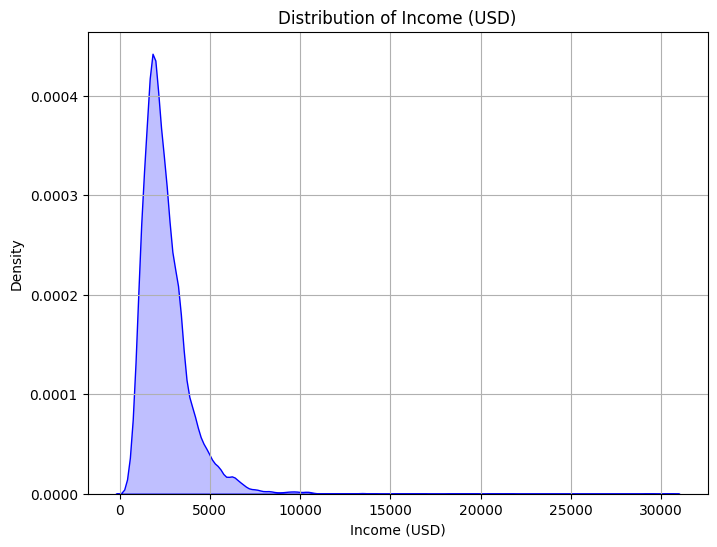

In [15]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Income (USD)'], fill=True, color='blue')
plt.title('Distribution of Income (USD)')
plt.xlabel('Income (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [16]:
median_income = df['Income (USD)'].median()
df['Income (USD)']=df['Income (USD)'].fillna(median_income)

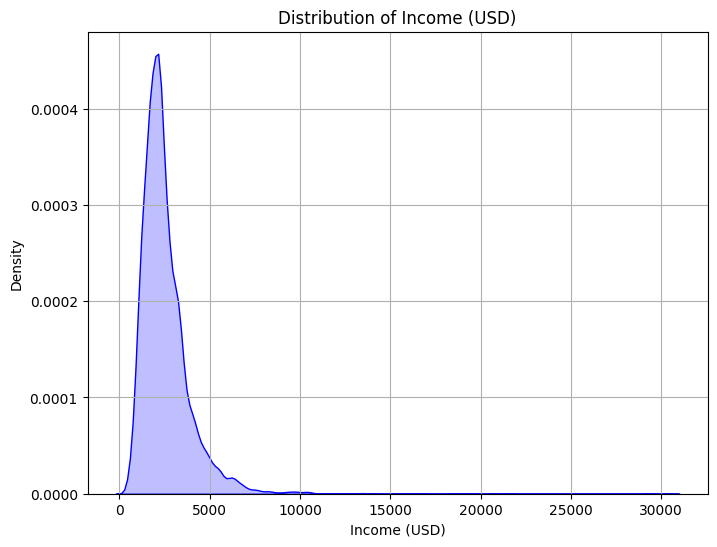

In [17]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Income (USD)'], fill=True, color='blue')
plt.title('Distribution of Income (USD)')
plt.xlabel('Income (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [18]:
print(df['Income (USD)'].isnull().sum())

0


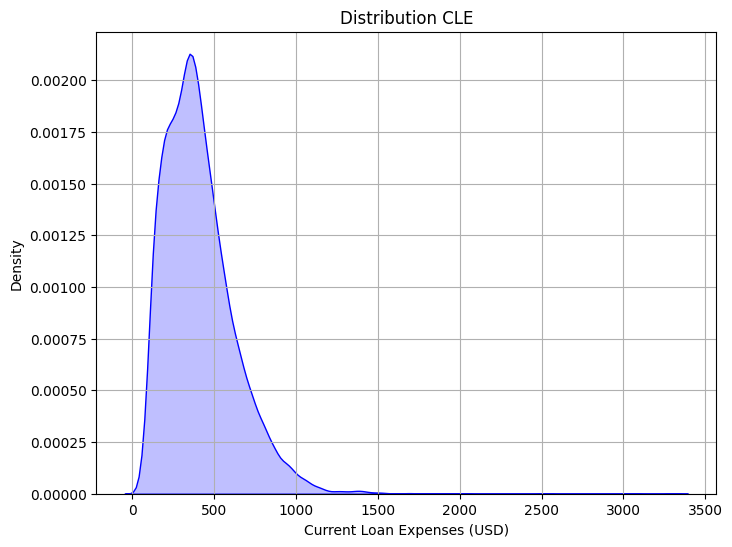

In [19]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Current Loan Expenses (USD)'], fill=True, color='blue')
plt.title('Distribution CLE')
plt.xlabel('Current Loan Expenses (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [20]:
median_income = df['Current Loan Expenses (USD)'].median()
df['Current Loan Expenses (USD)']=df['Current Loan Expenses (USD)'].fillna(median_income)

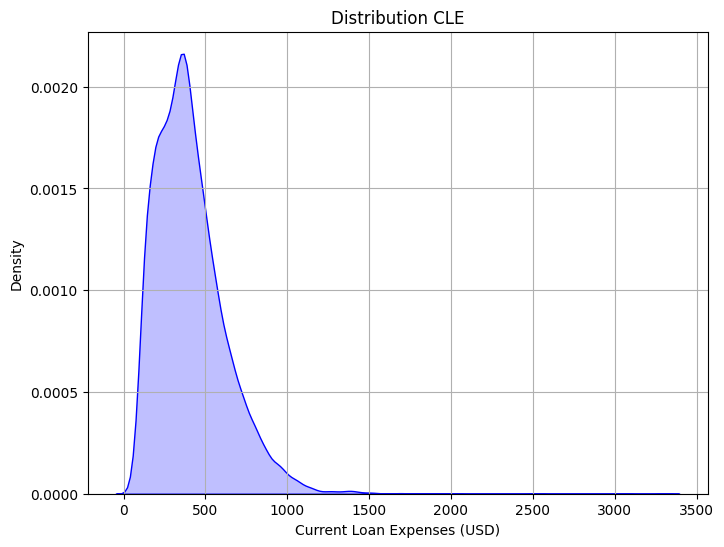

In [21]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Current Loan Expenses (USD)'], fill=True, color='blue')
plt.title('Distribution CLE')
plt.xlabel('Current Loan Expenses (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()



In [43]:
df['Income Stability'] = df['Income Stability'].replace(['',' ','nan'], 'NA')
df['Income Stability']=df['Income Stability'].fillna('NA')
df['Income Stability'].isnull().sum()

np.int64(0)

In [44]:
unique_values = df['Income Stability'].unique()
print(unique_values)


['Low' 'High' 'NA']


In [45]:
df['Income Stability'].value_counts()

Income Stability
Low     17501
High     1686
NA        813
Name: count, dtype: int64

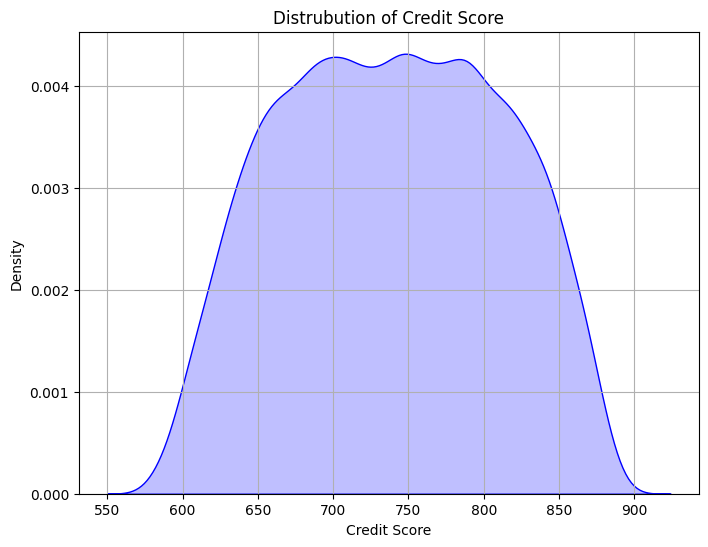

In [22]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Credit Score'], fill=True, color='blue')
plt.title('Distrubution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [96]:

df['Credit Score'] = df.groupby('Income Stability')['Credit Score'].transform(lambda x: x.fillna(x.median()))


In [97]:
df['Credit Score'].isna().sum()

np.int64(0)

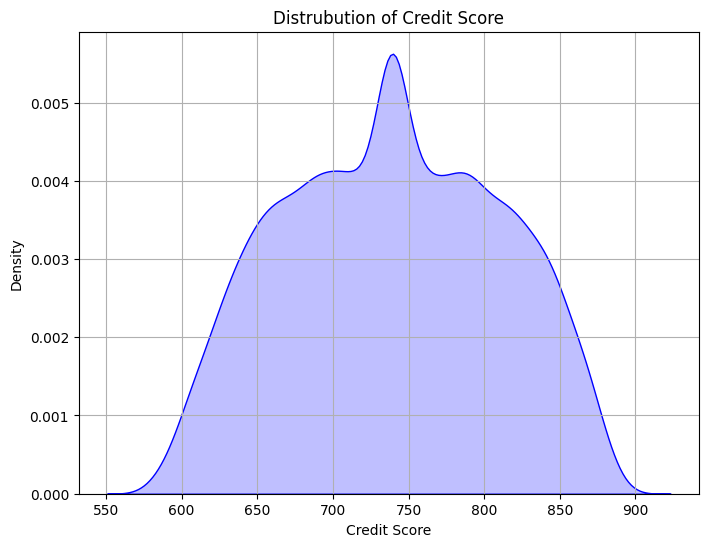

In [98]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Credit Score'], fill=True, color='blue')
plt.title('Distrubution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()


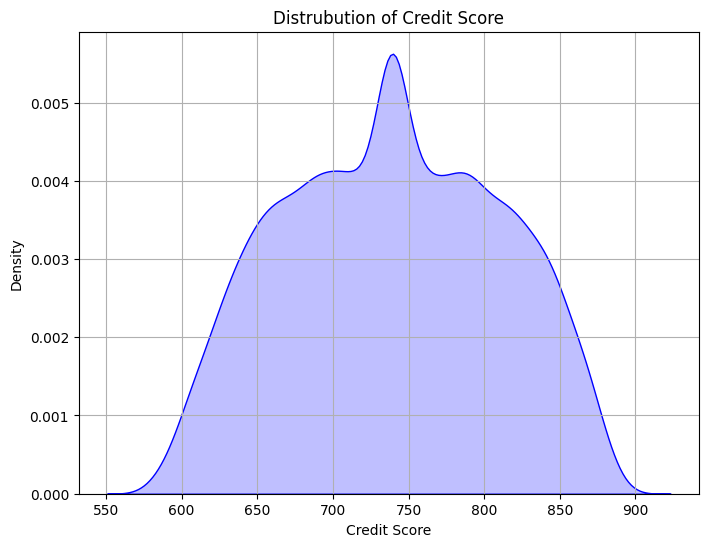

In [50]:
df.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

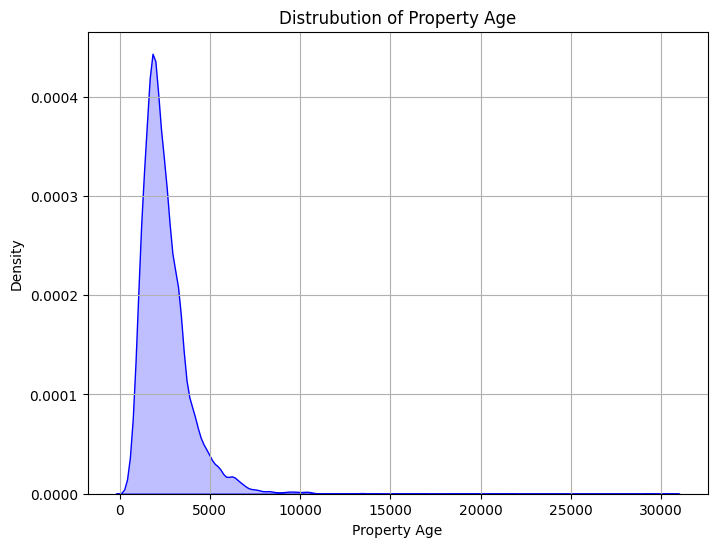

In [51]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Property Age'], fill=True, color='blue')
plt.title('Distrubution of Property Age')
plt.xlabel('Property Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [64]:
m = df['Property Age'].median()
df['Property Age']=df['Property Age'].fillna(m)

In [65]:
df['Property Age'].isnull().sum()

np.int64(0)

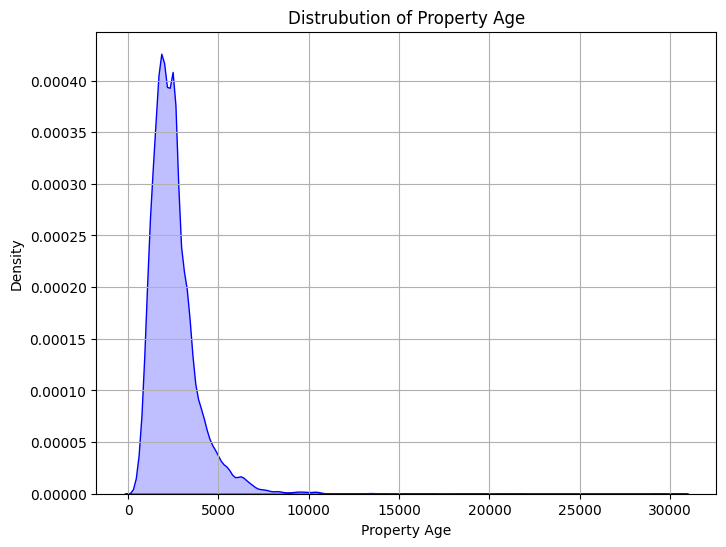

In [66]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Property Age'], fill=True, color='blue')
plt.title('Distrubution of Property Age')
plt.xlabel('Property Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [75]:
df['Property Location'].unique()

<StringArray>
['Urban', 'Rural', 'Semi-Urban', <NA>]
Length: 4, dtype: string

In [ ]:
df['Property Location'] = df['Property Location'].astype('string')
df['Property Location'].dtypes

### Filling Property Location based on other Property related values

In [83]:
mode_location = df.groupby(['Property Age', 'Property Type', 'Property Price'])['Property Location'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
df['Property Location'] = df.set_index(['Property Age', 'Property Type', 'Property Price'])['Property Location'].fillna(mode_location).reset_index()['Property Location']

print(df['Property Location'].isna().sum())

0


In [82]:
df['Property Type'].unique()

array([2, 1, 4, 3])

In [86]:
df.isna().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                      0
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
dtype: int64

In [87]:
df.head(5)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.140000,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.310000,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.440000,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.200000,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,738.821538,0,NaN,356,1939.23,4,Semi-Urban,1,180908


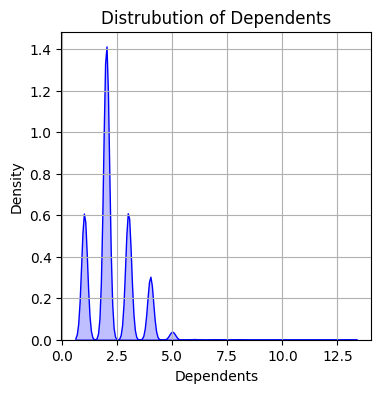

In [90]:
plt.figure(figsize=(4, 4))
sns.kdeplot(df['Dependents'], fill=True, color='blue')
plt.title('Distrubution of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [91]:
df['Dependents'] = df['Dependents'].fillna(0)


In [92]:
df['Dependents'].isna().sum()

np.int64(0)

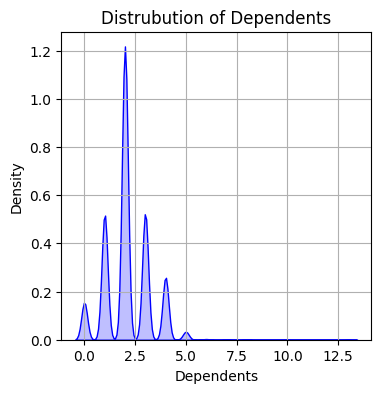

In [93]:
plt.figure(figsize=(4, 4))
sns.kdeplot(df['Dependents'], fill=True, color='blue')
plt.title('Distrubution of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [94]:
df['Has Active Credit Card'].unique()

array(['Unpossessed', 'Inactive', nan, 'Active'], dtype=object)

### Handling Outliers

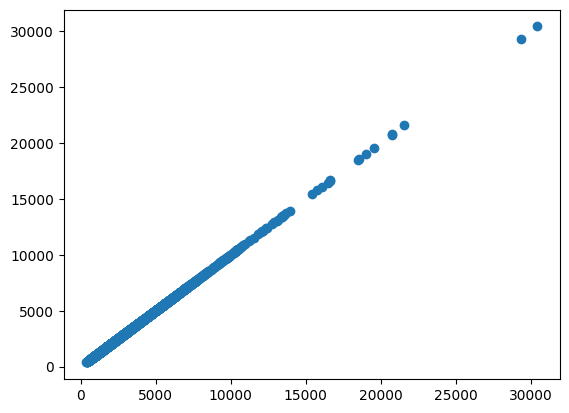

In [99]:
plt.scatter(df['Income (USD)'], df['Income (USD)'])

In [100]:
from scipy.stats import norm

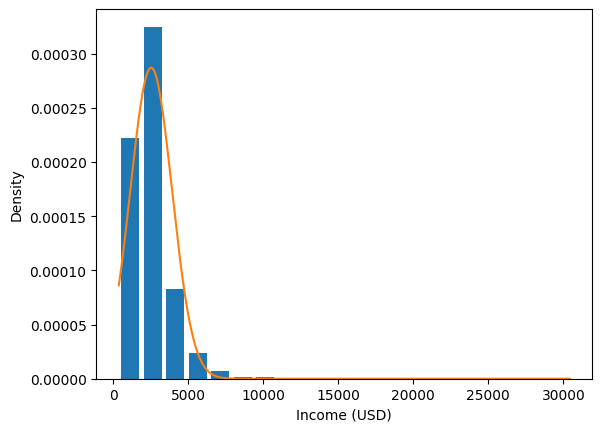

In [102]:
plt.hist(df['Income (USD)'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Income (USD)')
plt.ylabel('Density')

rng = np.arange(df['Income (USD)'].min(), df['Income (USD)'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df['Income (USD)'].mean(), df['Income (USD)'].std()))

In [103]:
df['Income (USD)'].describe()

count    20000.000000
mean      2525.280192
std       1390.372931
min        368.590000
25%       1678.365000
50%       2224.590000
75%       3047.982500
max      30427.680000
Name: Income (USD), dtype: float64

In [108]:
sf = df['Income (USD)'].quantile(0.75)
# print(sf)
len(df[df['Income (USD)'] > sf])

5000